In [62]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 붓꽃 자료 가져오기 

In [64]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' , header = None)

In [65]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## -
    - 0   - 꽃받침 길이 ( SepalLength ) 
    - 1   - 꽃받침의 폭 ( SepalWidth  )
    - 2   - 꽃잎의 길이 ( PetalWidth )
    - 3   - 꽃잎의 너비
    - 4   - 꽃 이름 

#### -
    - ~49 = Iris-setosa,(부채붓꽃) 
    - 50~99 = Iris - vericolor ( 버시칼라 ) 
    - 100~150 = Iris-virginica ( 버지니카 ) 

In [66]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Y-

In [116]:
y = df.iloc[0:100, 4].values # 1~100 2개의 품종의 01,2,3,4 호출 
y = np.where( y == 'Iris-setosa', -1 , 1 ) # y -> np 배열로 , 부채붓꽃이라면 -1, 아니면 1 로 출력
y



array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## X-
    -# 꽃받침 0 , 꽃받침 길이 2  호출

In [93]:
X = df.iloc[0:100 , [0,2] ].values 
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

Text(0.5, 0, 'petal length ')

Text(0, 0.5, 'sepal length ')

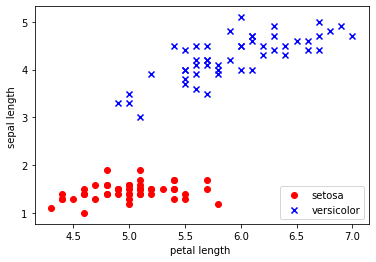

In [70]:
plt.scatter(x[:50,0] , x[:50 , 1 ] , color ='red' , marker='o' , label='setosa')  # 부채붓꽃 
plt.scatter(x[50:100,0] , x[50:100 , 1 ] , color ='blue' , marker='x' , label='versicolor') # 버시칼라 
plt.xlabel('petal length ') # 꽃잎의 길이 
plt.ylabel('sepal length ') # 꽃받침의 길이 
plt.legend( loc='lower right')
plt.show() # ? 

### 퍼셉트론 클래스
    # init
    - eta = 학습률
    - n_iter = 학습횟수
    
    # fit 
        업데이트 룰 
        X의 feature 를 받고 0과 더함 
        n_iter 만큼 반복 ( n_iter = 10 ) 
        
        X 의 feature = xi 
        y 의 feature = Target
        
        xi 와 w[1:] update 
        업데이트 룰 Wj = N(yi - ^yi ) * xj = eta * Target(y) - predict(xi)  
        -> w_ (가중치) 에 누적 
        -> errors -> errors_ 에 담음 
        
    # net_input 
        X 와 W 의 내적 
    # predict 
        X * W 된 return 값을  1 또는 -1 분류  ( step function ?  ) 

In [5]:
class Perceptron(object):

    def __init__ (self, eta=0.01 , n_iter=10 ):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self , X ,y): # X , y 는 각각 100행을 갖는 array (= 100개의 샘플 )
        """Fitting training data
        
            Parameters 
            X = shape[n_sample , n_feature ] training vectors
            y = Target values
            
            Return 
            self = object 객체
        """
        self.w_ = np.zeros(1+X.shape[1]) # W_ = 가중치 / X.shape[1] 은  1...?행의 feature의 갯수 /  1은 편향(바이오스) , 
        self.errors_ = []
        
        for _ in range(self.n_iter): # 10번 돌리고 에러를 찾고 에러를 찾는다면 그 에러를 업데이트 함
            errors = 0
            for xi , target in zip(X,y): # update 룰 
                update = self.eta * (target-self.predict(xi))
                self.w_[1:] += update*xi  # 하나의 feature 에 대한 가중치 업데이트
                self.w_[0] += update      # 편향(상수)에 대한 가중치 업데이트
                errors += int(update != 0.0) # 에러 횟수 
            self.errors_.append(errors)
        return self
            
    def net_input ( self , X , ): # x*w 내적 
        " calculate net input"
        return np.dot(X,self.w_[1:]+self.w_[0]) # w_[0] 은 편향 
    
    def predict(self , X): # 
        "return class label after unit step"
        return np.where(self.net_input(X) >=0 , 1 , -1)

#### 붓꽃 데이터를 퍼셉트론으로 분류하기 

In [6]:
ppn = Perceptron(eta=0.1 , n_iter = 10 )

ppn.fit(X,y)

# 분류확인하기 

# 6 번이후 부터 횟수지정이 적합하다는것을 보여줌 
plt.plot(range(1,len(ppn.errors_) +1), ppn.errors_marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifcations')
plt.show()

SyntaxError: keyword can't be an expression (<ipython-input-6-84bb4c23cbdb>, line 8)

In [3]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y, classifier , resolution =0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min , x1_max = x[:0].min()-1, X[:0].max()+1
    x2_min , x2_max = x[:1].min()-1, X[:1].max()+1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , resolution),
                           np.arange(x2_min , x2_max , resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2 , z, alpha=0.4 , cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min() , xx2.max())
    
    for idx , cl in enumerate(np.unique(y)):
        plt.scatter(x=X[ y==cl , 0], y=X[y==cl , 1],
                   alpha=0.8 , c=cmap(idx),
                   marker=markers[idx] , label =cl)

In [2]:
plot_decision_regions( X , y , classifier = ppn)
plt.xlabel('sepal length(cm)')
plt.ylabel('petal length(cm)')
plt.legend( loc ='upper left')
plt.show()
## 완벽하게 구분이 된다면 퍼셉트론 완성 

NameError: name 'plot_decision_regions' is not defined

NameError: name 'self' is not defined